### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피 처 : Weight, Height, Width
- 타 겟 : Weight
- [조건]
    * 특성 추가 => degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [66]:
import pandas as pd

In [67]:
file_data = '../DATA/perch3.csv'

In [68]:
perchDF = pd.read_csv(file_data)
perchDF.shape

(56, 4)

In [69]:
perchDF.head()

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


In [70]:
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
 2   Height  56 non-null     float64
 3   Width   56 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [71]:
featureDF = perchDF[perchDF.columns[1:]]
targetSR = perchDF.Weight

print(f'Feature => {featureDF.shape}\nTarget => {targetSR.shape}')

Feature => (56, 3)
Target => (56,)


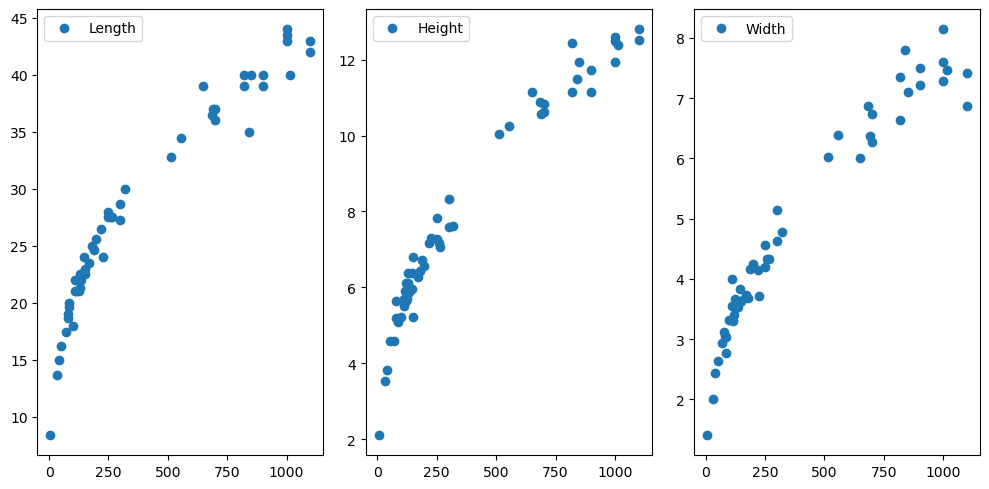

In [72]:
import matplotlib.pyplot as plt

# Feature와 Target의 관계 조사
plt.figure(figsize = (10, 5))
for ind in range(1, 4):
    plt.subplot(1, 3, ind)
    col_name = featureDF.columns[ind-1]
    plt.plot(targetSR, featureDF[col_name], 'o', label = col_name)
    plt.legend()

plt.tight_layout()
plt.show()


[3] 데이터 가공 <hr>
- 특성 추가
- 특성 스케일링

[3-1] 특성 추가

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(featureDF)

poly_feature = poly.transform(featureDF)

In [74]:
print(f'특성 추가 => {poly_feature.shape}\n{poly.feature_names_in_} => {poly.get_feature_names_out()}')

특성 추가 => (56, 55)
['Length' 'Height' 'Width'] => ['Length' 'Height' 'Width' 'Length^2' 'Length Height' 'Length Width'
 'Height^2' 'Height Width' 'Width^2' 'Length^3' 'Length^2 Height'
 'Length^2 Width' 'Length Height^2' 'Length Height Width' 'Length Width^2'
 'Height^3' 'Height^2 Width' 'Height Width^2' 'Width^3' 'Length^4'
 'Length^3 Height' 'Length^3 Width' 'Length^2 Height^2'
 'Length^2 Height Width' 'Length^2 Width^2' 'Length Height^3'
 'Length Height^2 Width' 'Length Height Width^2' 'Length Width^3'
 'Height^4' 'Height^3 Width' 'Height^2 Width^2' 'Height Width^3' 'Width^4'
 'Length^5' 'Length^4 Height' 'Length^4 Width' 'Length^3 Height^2'
 'Length^3 Height Width' 'Length^3 Width^2' 'Length^2 Height^3'
 'Length^2 Height^2 Width' 'Length^2 Height Width^2' 'Length^2 Width^3'
 'Length Height^4' 'Length Height^3 Width' 'Length Height^2 Width^2'
 'Length Height Width^3' 'Length Width^4' 'Height^5' 'Height^4 Width'
 'Height^3 Width^2' 'Height^2 Width^3' 'Height Width^4' 'Width^5']


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_feature, targetSR, random_state = 42)

[3-2] 피처 스케일링

In [76]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [77]:
scaled_X_train = std_scaler.transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

[4] 학습 진행 <hr>

In [78]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(scaled_X_train, y_train)

LinearRegression()

In [79]:
train_score = lr_model.score(scaled_X_train, y_train)
test_score = lr_model.score(scaled_X_test, y_test)

print(f'TRAIN SCORE => {train_score} TEST SCORE => {test_score}')

TRAIN SCORE => 1.0 TEST SCORE => -340.4283450024159


### 규제 : 가중치 값을 조절해서 과대적합 문제 해결 <hr>
- Ridge : 모든 피처에 가중치를 0에 가깝게 조절
- Lasso : 특정 피처의 가중치를 0으로 하여 차원 축소

- [규제 1] Ridge

In [80]:
from sklearn.linear_model import Ridge

In [81]:
ridge_model = Ridge(random_state = 5)
ridge_model.fit(scaled_X_train, y_train)

Ridge(random_state=5)

In [82]:
train_score = ridge_model.score(scaled_X_train, y_train)
test_score = ridge_model.score(scaled_X_test, y_test)

print(f'TRAIN SCORE => {train_score} TEST SCORE => {test_score}')

TRAIN SCORE => 0.9896217956447125 TEST SCORE => 0.9788853860988025


In [83]:
# 모델 파라미터
print(ridge_model.n_iter_, ridge_model.coef_, ridge_model.intercept_)

None [18.80235309  9.98914569  9.66065362 17.30700292 14.43629693 12.67741103
 12.35180678 10.86558964 12.56697259 12.94844836 12.69165047  9.08607426
 12.5066326   8.99703422  8.36548777 12.22553007  8.97005342  8.8361858
 11.70193029  7.48831196  9.00197361  3.33293799 10.29510404  4.58842194
  1.56199368 11.24046153  5.63637436  2.94429366  3.15888691 11.73894754
  6.37809742  4.15741148  5.0559018   8.9397099   1.91254297  4.84675504
 -2.94085886  7.43071345 -0.52107102 -5.94672363  9.54685836  1.55811731
 -3.69183588 -6.14463002 11.09672077  3.20307766 -1.73618275 -3.66130422
 -2.60469326 12.00382898  4.34096613 -0.15102559 -1.41825686  0.48404546
  5.39743758] 400.8333333333333


In [84]:
# 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.,]

ridge_score = [[], []]
for a in alphas:
    ridge_model = Ridge(alpha = a)
    ridge_model.fit(scaled_X_train, y_train)
    train_score = ridge_model.score(scaled_X_train, y_train)
    test_score = ridge_model.score(scaled_X_test, y_test)
    
    ridge_score[0].append(train_score)
    ridge_score[1].append(test_score)

In [85]:
# 테스트 점수가 가장 높은 alpha
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]

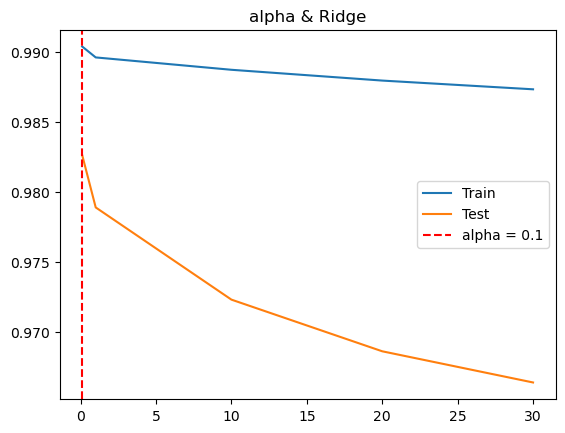

In [86]:
# 학습 및 테스트 점수 시각화
plt.plot(alphas, ridge_score[0], label = 'Train')
plt.plot(alphas, ridge_score[1], label = 'Test')
plt.axvline(best_alpha, linestyle = '--', color = 'red', label = f'alpha = {best_alpha}')
plt.legend()
plt.title('alpha & Ridge')
plt.show()

[규제 2] Lasso

In [87]:
from sklearn.linear_model import Lasso

In [88]:
lasso_model = Lasso(random_state = 5)
lasso_model.fit(scaled_X_train, y_train)

Lasso(random_state=5)

In [89]:
train_score = lasso_model.score(scaled_X_train, y_train)
test_score = lasso_model.score(scaled_X_test, y_test)

print(f'TRAIN SCORE => {train_score} TEST SCORE => {test_score}')

TRAIN SCORE => 0.9898014198970121 TEST SCORE => 0.9798798667260246


In [90]:
# 모델 파라미터
print(lasso_model.n_iter_, lasso_model.coef_, lasso_model.intercept_)

1000 [ 0.          0.          0.         95.7685471  11.46652141  0.
 10.59590887  0.         31.43846725  0.         22.04978402  0.
 29.29490849  0.          0.         18.62846362  0.          0.
 41.66512381  0.          0.          0.          0.          0.
  0.          5.98289456  0.          0.          0.         20.52247113
  0.          0.          0.          9.14669521  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         35.34452564  0.          0.          0.
  0.         21.08199235  0.          0.          0.          0.
  0.        ] 400.8333333333333


In [91]:
# 최적의 규제 강도 설정 값 찾기
alphas = [0.1, 1., 10., 20., 30.,]

lasso_score = [[], []]
for a in alphas:
    lasso_model = Lasso(alpha = a, max_iter = 10000)
    lasso_model.fit(scaled_X_train, y_train)
    train_score = lasso_model.score(scaled_X_train, y_train)
    test_score = lasso_model.score(scaled_X_test, y_test)
    
    lasso_score[0].append(train_score)
    lasso_score[1].append(test_score)

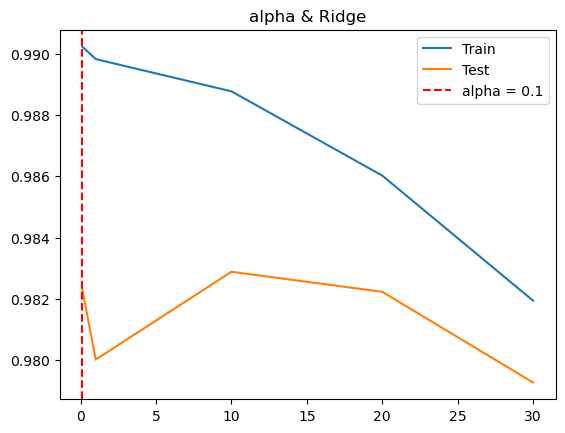

In [92]:
# 학습 및 테스트 점수 시각화
plt.plot(alphas, lasso_score[0], label = 'Train')
plt.plot(alphas, lasso_score[1], label = 'Test')
plt.axvline(best_alpha, linestyle = '--', color = 'red', label = f'alpha = {best_alpha}')
plt.legend()
plt.title('alpha & Ridge')
plt.show()